In [159]:
import pandas as pd
from scipy.stats import chi2_contingency

In [160]:
# Change filename to the desired file created with analyzer.py
df = pd.read_json (r'output_2021-02-27_17:40:30.txt')
print(df.head())

            total_tweets  wc-papier  wc papier  wcpapier  toiletpapier  \
2020-02-10        496626          2          5       0.0            10   
2020-02-11        503091          2          1       0.0             7   
2020-02-12        521487          1          6       0.0             4   
2020-02-13        534839          3         12       1.0            12   
2020-02-14        497052          4          7       2.0             8   

            toilet papier  
2020-02-10              0  
2020-02-11              0  
2020-02-12              0  
2020-02-13              0  
2020-02-14              0  


[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Tweets with mentions of the keyword')]

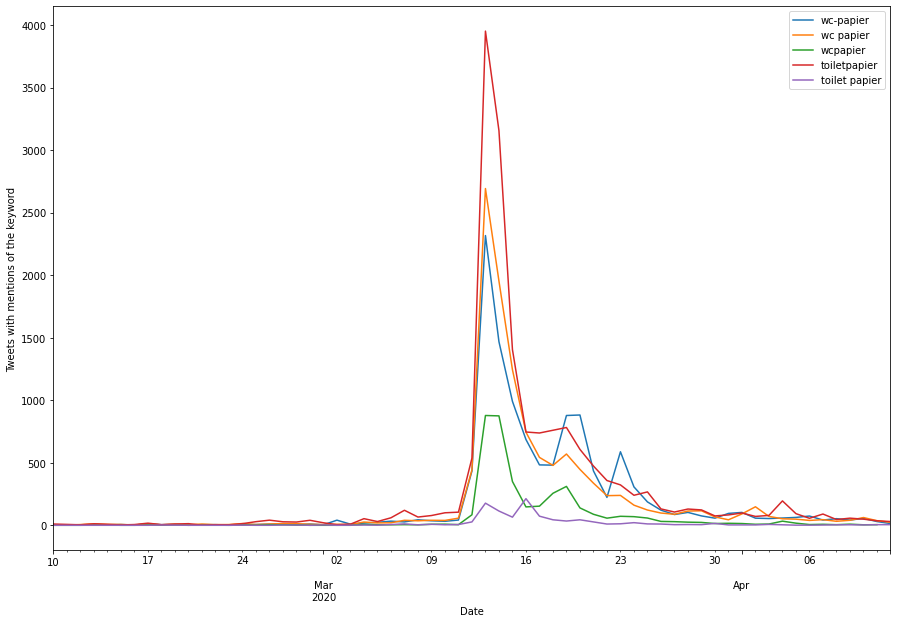

In [161]:
plot_all_words = df.loc[:, df.columns != 'total_tweets'].plot(figsize=(15,10))
plot_all_words.set(xlabel="Date", ylabel="Tweets with mentions of the keyword")

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Total amount of Tweets')]

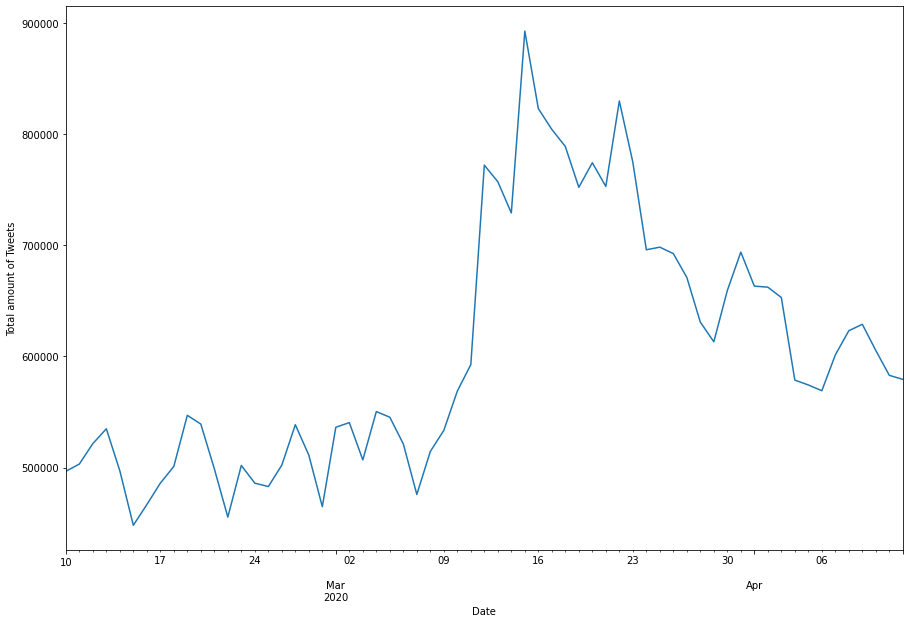

In [162]:
plot_total_tweets = df['total_tweets'].plot(figsize=(15,10))
plot_total_tweets.set(xlabel="Date", ylabel="Total amount of Tweets")

In [163]:
df['total_keywords'] = (df.sum(axis=1)-df['total_tweets'])

In [164]:
df['total_without_keywords'] = (df['total_tweets']-df['total_keywords'])

In [165]:
df['keywords_percentage'] = (df['total_keywords'] * 100 / df['total_tweets'])

[Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Percentage of keyword tweets out of the total amount of tweets')]

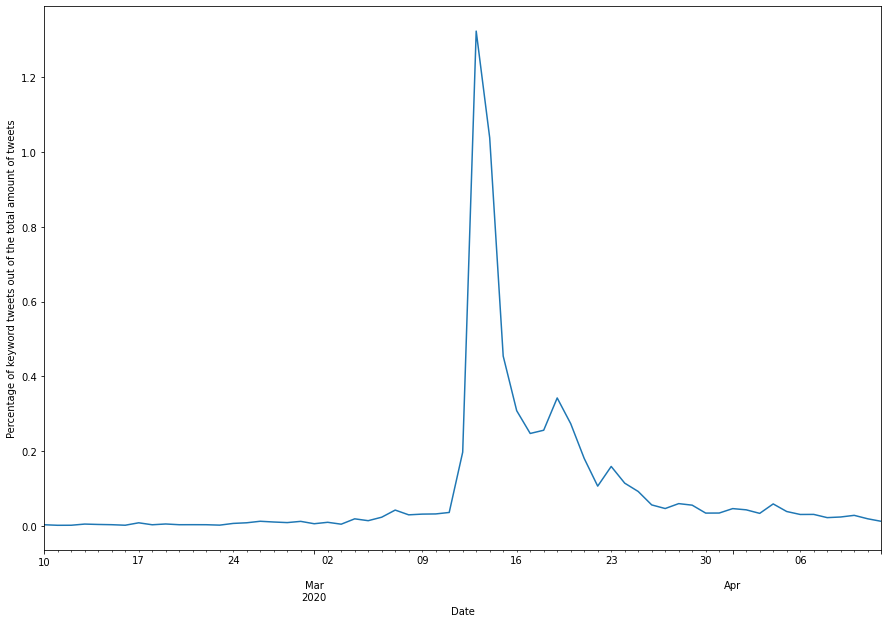

In [166]:
plot_total_tweets = df['keywords_percentage'].plot(figsize=(15,10))
plot_total_tweets.set(
    xlabel="Date",
    ylabel="Percentage of keyword tweets out of the total amount of tweets"
    )

In [167]:
df1 = df.reset_index()
df1.rename(columns={'index': 'Date'}, inplace=True)

df1.head()

,Date,total_tweets,wc-papier,wc papier,wcpapier,toiletpapier,toilet papier,total_keywords,total_without_keywords,keywords_percentage
0,2020-02-10,496626,2,5,0.0,10,0,17.0,496609.0,0.003423
1,2020-02-11,503091,2,1,0.0,7,0,10.0,503081.0,0.001988
2,2020-02-12,521487,1,6,0.0,4,0,11.0,521476.0,0.002109
3,2020-02-13,534839,3,12,1.0,12,0,28.0,534811.0,0.005235
4,2020-02-14,497052,4,7,2.0,8,0,21.0,497031.0,0.004225


In [168]:
gb1 = df1.groupby(pd.Grouper(key='Date',freq='31D'))[['total_keywords']].sum()

In [169]:
gb2 = df1.groupby(pd.Grouper(key='Date',freq='31D'))[['total_without_keywords']].sum()

In [170]:
cont_matr = pd.concat([gb1, gb2], axis=1)[:-1]
cont_matr = cont_matr.transpose()
cont_matr

Date,2020-02-10,2020-03-12
total_keywords,1915.0,43544.0
total_without_keywords,15865386.0,21502391.0


In [176]:
chi2, p, dof, ex = chi2_contingency(cont_matr)
print(f'The p value of the chi-square test is {p}.')

The p value of the chi-square test is 0.0.


In [172]:
cont_matr['Total'] = cont_matr.sum(axis=1)

In [173]:
cont_matr.append(cont_matr.sum(axis=0).rename('Total'))

Date,2020-02-10 00:00:00,2020-03-12 00:00:00,Total
total_keywords,1915.0,43544.0,45459.0
total_without_keywords,15865386.0,21502391.0,37367777.0
Total,15867301.0,21545935.0,37413236.0
